Send this ipynb file with your code (solution) to econometrics.methods@gmail.com

In the subject of the e-mail, copy and paste only the title of this file without the extension ".ipynb"

Write the name of the members of your group in the e-mail, and not here.

Only one student will send me the solution. This student is responsible to copy other members of the group in the e-mail. 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# `matplotlib`

[`matplotlib`][mpl] is the most widely used plotting library available for Python.
It comes with a good amount of out-of-the-box functionality and is highly
customizable. Most other plotting libraries in Python provide simpler ways to generate
complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about
`matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt
	
The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `cos(x)` from 0 to 2 * pi (you've made this in homework 1
already).

[mpl]: http://matplotlib.org/

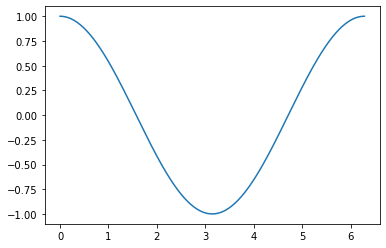

In [2]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.cos(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the
same plot. Just call `plt.plot` multiple times in the same cell:

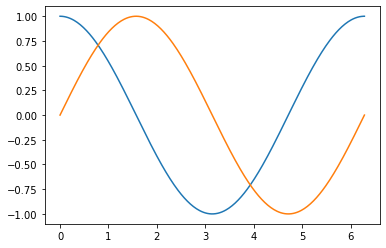

In [3]:
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

**Question 1:**
That plot looks pretty nice but isn't publication-ready. Luckily, `matplotlib`
has a wide array of plot customizations.

Skim through the first part of the tutorial at
https://www.labri.fr/perso/nrougier/teaching/matplotlib
to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add
a legend.

![](q1.png)

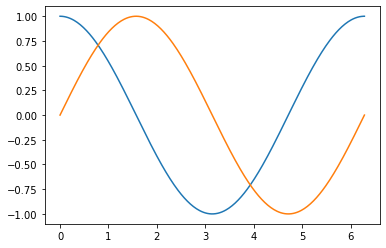

In [4]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

## Dataset: Bikeshare trips

Today, we'll be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C. 

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [5]:
path ='https://github.com/VitorKamada/DataScience/raw/master/Labs/Data/'
bike_trips = pd.read_csv(path + 'bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `plotfunc` is one of the functions listed here: http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#other-plots

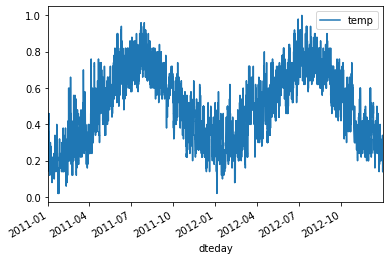

In [6]:
# This plot shows the temperature at each data point

bike_trips.plot.line(x='dteday', y='temp')

# Stop here! Discuss why this plot is shaped like this with your partner.

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

**Question 2:**
Use seaborn's `barplot` function to make a bar chart showing the average
number of registered riders on each day of the week over the 
entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html

See if you can figure it out by reading the docs and talking with your partner.

Once you have the plot, discuss it with your partner. What trends do you
notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping
to make those.

In [7]:
...

Ellipsis

**Question 3:** Now for a fancier plot that `seaborn` makes really easy to produce.

Use the `distplot` function to plot a histogram of all the total rider counts in the
`bike_trips` dataset.

In [8]:
...

Ellipsis

Notice that `seaborn` will fit a curve to the histogram of the data. Fancy!

**Question 4:**
Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership).

The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make
the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns
a `matplotlib` Axes object which represents a single plot and
has a `set_yscale` function.

The result should look like:

![](q5.png)

In [9]:
...

Ellipsis

**Question 5:** Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe.

In [10]:
...

Ellipsis

 Notice that `seaborn` automatically fits a line of best
fit to the plot. 

You should note that `lm_plot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary 
or misleading.

**Question 6:** There seem to be two main groups in the scatterplot. Let's
see if we can separate them out.

Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like:

![](q9.png)

In [11]:
# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 6}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.
...

# Note that the legend for workingday isn't super helpful. 0 in this case
# means "not a working day" and 1 means "working day". Try fixing the legend
# to be more descriptive.

Ellipsis

## Want to learn more?

We recommend checking out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

Here's a great blog post about the differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/

